Correlation Matrix:
               Lag1      Lag2      Lag3      Lag4      Lag5    Volume     Today  Direction
Lag1       1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910 -0.026155  -0.039757
Lag2      -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383 -0.010250  -0.024081
Lag3      -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824 -0.002448   0.006132
Lag4      -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414 -0.006900   0.004215
Lag5      -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002 -0.034860   0.005423
Volume     0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000  0.014592   0.022951
Today     -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592  1.000000   0.730563
Direction -0.039757 -0.024081  0.006132  0.004215  0.005423  0.022951  0.730563   1.000000


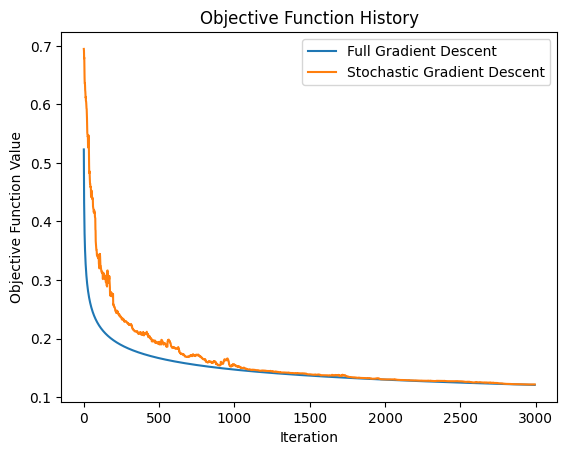

Misclassified points (Full Gradient Descent): 1
Misclassified points (Stochastic Gradient Descent): 3
Error (Full Gradient Descent): 0.003968253968253968
Accuracy (Full Gradient Descent): 0.996031746031746
Error (Stochastic Gradient Descent): 0.011904761904761904
Accuracy (Stochastic Gradient Descent): 0.9880952380952381
Comparison Table:
     Full_Probability  Full_Classifier  Stochastic_Probability  Stochastic_Classifier  Actual_Direction
0            0.012267                0                0.012883                      0                 0
1            0.001961                0                0.002323                      0                 0
2            0.132266                0                0.149146                      0                 0
3            0.880739                1                0.889307                      1                 1
4            0.321190                0                0.335277                      0                 0
5            0.858952              

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the Smarket dataset by using pandas
data = pd.read_csv("smarket.csv")

# Converting the 'Direction' column to binary labels (1 for 'Up', 0 for 'Down')
data['Direction'] = np.where(data['Direction'] == 'Up', 1, 0)

# Define logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define function to calculate full gradient
def fullGradient(w, X, y):
    N = X.shape[0]
    grad = np.dot(X.T, sigmoid(np.dot(X, w)) - y) / N
    return grad

# Define function to calculate stochastic gradient
def randGradient(w, X, y, n):
    grad = (sigmoid(np.dot(X[n], w)) - y[n]) * X[n]
    return grad

# Define gradient descent function
def fdescent(X, y, rho, job, nEpoch):
    N, d = X.shape
    w = np.zeros(d)  # Initialize weights
    f_history = []    # Store history of objective function

    if job == 'full':
        # Full batch gradient descent
        for epoch in range(N*nEpoch):
            grad = fullGradient(w, X, y)
            w -= rho(epoch+1) * grad
            # Compute objective function value
            f_val = np.mean(-y * np.log(sigmoid(np.dot(X, w))) - (1 - y) * np.log(1 - sigmoid(np.dot(X, w))))
            f_history.append(f_val)
    elif job == 'stochastic':
        # Stochastic gradient descent
        for epoch in range(nEpoch):
            idx = np.random.permutation(N)
            for n in idx:
                grad = randGradient(w, X, y, n)
                w -= rho(epoch * N + n + 1) * grad
                # Compute objective function value
                f_val = np.mean(-y * np.log(sigmoid(np.dot(X, w))) - (1 - y) * np.log(1 - sigmoid(np.dot(X, w))))
                f_history.append(f_val)
    else:
        raise ValueError("Invalid job type. Use 'full' or 'stochastic'.")

    return w, f_history

# Compute correlation matrix
correlation_matrix = data.iloc[:, 1:].corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix.to_string(line_width=1000))

# Split data into training and test sets
train_data = data[data['Year'] != 2005]
test_data = data[data['Year'] == 2005]

# Extract features and target variable for training set
X_train = train_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume','Today']].values
X_train = np.column_stack((np.ones(len(X_train)), X_train))  # Add bias term
y_train = train_data['Direction'].values

# Extract features and target variable for test set
X_test = test_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']].values
X_test = np.column_stack((np.ones(len(X_test)), X_test))  # Add bias term
y_test = test_data['Direction'].values

# Define learning rate schedule
def rho(t):
    return 1 / np.sqrt(t)

# Run full gradient descent
w_full, f_history_full = fdescent(X_train, y_train, rho, 'full', nEpoch=3)

# Run stochastic gradient descent
w_stochastic, f_history_stochastic = fdescent(X_train, y_train, rho, 'stochastic', nEpoch=3)

# Plot the histories of the objective function
plt.plot(range(len(f_history_full)), f_history_full, label='Full Gradient Descent')
plt.plot(range(len(f_history_stochastic)), f_history_stochastic, label='Stochastic Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Objective Function History')
plt.legend()
plt.show()

# Function to compute predictions and misclassifications
def evaluate_model(w, X, y):
    predictions = (sigmoid(np.dot(X, w)) >= 0.5).astype(int)
    misclassified = np.sum(predictions != y)
    return predictions, misclassified

# Evaluate full gradient descent
predictions_full, misclassified_full = evaluate_model(w_full, X_test, y_test)

# Evaluate stochastic gradient descent
predictions_stochastic, misclassified_stochastic = evaluate_model(w_stochastic, X_test, y_test)

print("Misclassified points (Full Gradient Descent):", misclassified_full)
print("Misclassified points (Stochastic Gradient Descent):", misclassified_stochastic)

# Calculate error and accuracy for full gradient descent
error_full = misclassified_full / len(y_test)
accuracy_full = 1 - error_full

# Calculate error and accuracy for stochastic gradient descent
error_stochastic = misclassified_stochastic / len(y_test)
accuracy_stochastic = 1 - error_stochastic

# Print error and accuracy for both methods
print("Error (Full Gradient Descent):", error_full)
print("Accuracy (Full Gradient Descent):", accuracy_full)

print("Error (Stochastic Gradient Descent):", error_stochastic)
print("Accuracy (Stochastic Gradient Descent):", accuracy_stochastic)

# Function to create comparison table
def create_comparison_table(predictions_full, predictions_stochastic, y_test):
    # Create DataFrame to store results
    comparison_df = pd.DataFrame(columns=['Full_Probability', 'Full_Classifier', 'Stochastic_Probability', 'Stochastic_Classifier', 'Actual_Direction'])

    # Fill DataFrame with results
    comparison_df['Full_Probability'] = sigmoid(np.dot(X_test, w_full))
    comparison_df['Full_Classifier'] = predictions_full
    comparison_df['Stochastic_Probability'] = sigmoid(np.dot(X_test, w_stochastic))
    comparison_df['Stochastic_Classifier'] = predictions_stochastic
    comparison_df['Actual_Direction'] = y_test

    return comparison_df

# Create comparison table
comparison_table = create_comparison_table(predictions_full, predictions_stochastic, y_test)

# Print the comparison table
print("Comparison Table:")
print(comparison_table.to_string(line_width=1000))

In [ ]:
# Modify dataset for predicting the direction of the following day
modified_data = data.iloc[:-1, :].copy()  # Create a copy of the DataFrame
modified_data['Direction'] = modified_data['Direction'].shift(-1)
modified_data.dropna(inplace=True)

# Split modified data into training and test sets
modified_train_data = modified_data[modified_data['Year'] != 2005]
modified_test_data = modified_data[modified_data['Year'] == 2005]

# Extract features and target variable for modified dataset
X_modified_train = modified_train_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']].values
X_modified_train = np.column_stack((np.ones(len(X_modified_train)), X_modified_train))  # Add bias term
y_modified_train = modified_train_data['Direction'].values

X_modified_test = modified_test_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']].values
X_modified_test = np.column_stack((np.ones(len(X_modified_test)), X_modified_test))  # Add bias term
y_modified_test = modified_test_data['Direction'].values

# Run full gradient descent on modified dataset
w_full_modified, _ = fdescent(X_modified_train, y_modified_train, rho, 'full', nEpoch=3)

# Run stochastic gradient descent on modified dataset
w_stochastic_modified, _ = fdescent(X_modified_train, y_modified_train, rho, 'stochastic', nEpoch=3)

# Evaluate modified full gradient descent
predictions_full_modified, misclassified_full_modified = evaluate_model(w_full_modified, X_modified_test, y_modified_test)

# Evaluate modified stochastic gradient descent
predictions_stochastic_modified, misclassified_stochastic_modified = evaluate_model(w_stochastic_modified, X_modified_test, y_modified_test)

print("Misclassified points (Modified Full Gradient Descent):", misclassified_full_modified)
print("Misclassified points (Modified Stochastic Gradient Descent):", misclassified_stochastic_modified)

Misclassified points (Modified Full Gradient Descent): 111
Misclassified points (Modified Stochastic Gradient Descent): 107
